<a href="https://colab.research.google.com/github/samuelhtampubolon/SDPM2025/blob/main/Bias_Variance_Tradeoff_and_Overfitting_Analysis_Using_Scikit_Learn_with_Synthetic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.metrics import mean_squared_error

# Generate synthetic regression data
X, y = make_regression(n_samples=200, n_features=1, noise=20, random_state=42)

In [2]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Train models with varying depths
depths = np.arange(1, 10)
train_errors, test_errors = [], []
for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train, y_train)
    train_errors.append(mean_squared_error(y_train, model.predict(X_train)))
    test_errors.append(mean_squared_error(y_test, model.predict(X_test)))

# Prints
print("Train Errors (sample):", train_errors[:3])
print("Test Errors (sample):", test_errors[:3])
print("Optimal Depth (min test error):", depths[np.argmin(test_errors)])

Train Errors (sample): [2716.170757053467, 887.1270235679876, 408.66875094855783]
Test Errors (sample): [3347.415306954144, 1865.389213759645, 861.9550977404276]
Optimal Depth (min test error): 4


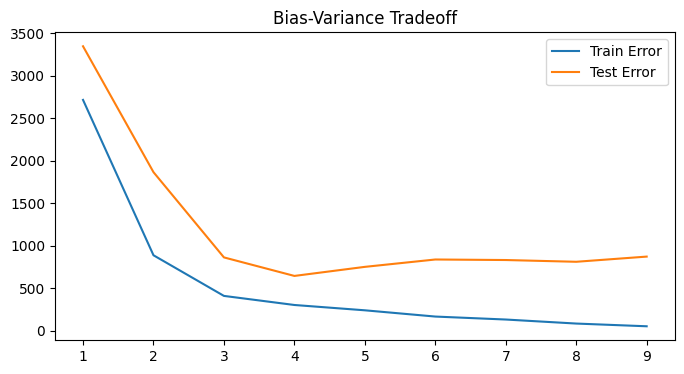

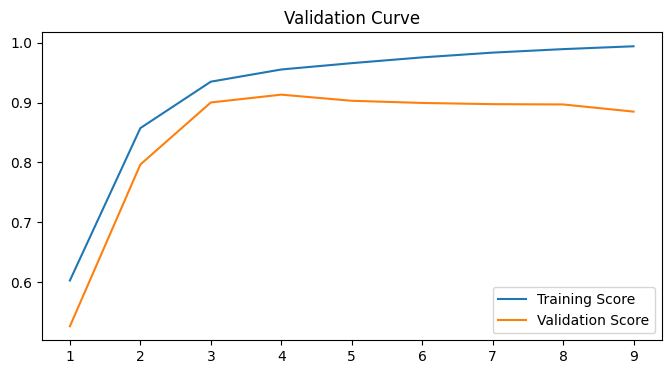

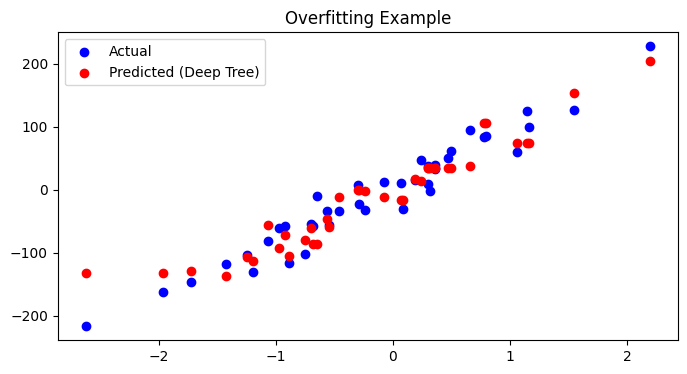

In [4]:
# Visual 1: Bias-Variance Tradeoff Curve
plt.figure(figsize=(8, 4))
plt.plot(depths, train_errors, label='Train Error')
plt.plot(depths, test_errors, label='Test Error')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.show()

# Visual 2: Validation Curve
param_range = np.arange(1, 10)
train_scores, val_scores = validation_curve(DecisionTreeRegressor(), X, y, param_name='max_depth', param_range=param_range, cv=5)
plt.figure(figsize=(8, 4))
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(param_range, np.mean(val_scores, axis=1), label='Validation Score')
plt.title('Validation Curve')
plt.legend()
plt.show()

# Visual 3: Overfitting Example Scatter (Deep Tree)
deep_model = DecisionTreeRegressor(max_depth=9)
deep_model.fit(X_train, y_train)
y_pred_deep = deep_model.predict(X_test)
plt.figure(figsize=(8, 4))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_deep, color='red', label='Predicted (Deep Tree)')
plt.title('Overfitting Example')
plt.legend()
plt.show()